# Problem 4.2

## Part a.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x, mu):
    return 4 * mu * x * (1 - x)

In [3]:
def print_iterates(x0, N=10):
    print(f'0: {x0}')
    x = x0
    
    for i in range(1, N + 1):
        x = f(x, mu=0.2)
        print(f'{i}: {x}')

In [4]:
print_iterates(0.1)

0: 0.1
1: 0.07200000000000002
2: 0.053452800000000016
3: 0.04047647853772801
4: 0.031070506578330284
5: 0.024084104159436976
6: 0.018803248069019493
7: 0.014759748744859528
8: 0.011633518849478518
9: 0.009198544070925876
10: 0.007291144686320888


In [5]:
print_iterates(0.4)

0: 0.4
1: 0.19200000000000003
2: 0.12410880000000002
3: 0.08696464461004802
4: 0.06352143615831686
5: 0.04758917064536139
6: 0.036259553186118454
7: 0.0279558383910892
8: 0.021739447592752405
9: 0.0170134752088915
10: 0.013379213496166349


In [6]:
print_iterates(0.5)

0: 0.5
1: 0.2
2: 0.12800000000000003
3: 0.08929280000000003
4: 0.06505567669452801
5: 0.048658748499476046
6: 0.03703285975515263
7: 0.02852914164280626
8: 0.02217218377594477
9: 0.017344462434040402
10: 0.013634905645531652


In [7]:
print_iterates(0.8)

0: 0.8
1: 0.128
2: 0.0892928
3: 0.06505567669452801
4: 0.048658748499476046
5: 0.03703285975515263
6: 0.02852914164280626
7: 0.02217218377594477
8: 0.017344462434040402
9: 0.013634905645531652
10: 0.010759195994855282


In [8]:
X = np.linspace(0, 1, num=1000)
Y = f(X, mu=0.2)

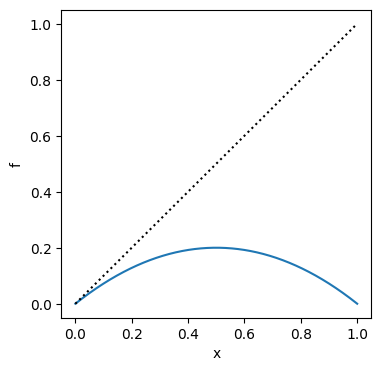

In [9]:
plt.figure(figsize=(4, 4))
plt.plot(X, Y)
plt.plot(X, X, color='k', linestyle=':')
plt.xlabel('x')
plt.ylabel('f');

If there is a non-zero fixed point, we must have

$$
x^* = 4 \mu x^* (1 - x^*)
$$

Because $x^* \neq 0$, we can divide by $x^*$,

$$
1 - x^* = \frac{1}{4\mu}
$$

or,

$$
x^* = 1 - \frac{1}{4\mu}
$$

For the fixed point to be stable, we must have $|f^{\prime}(x)| < 1$.

$$
4\mu(1 - 2x^*) < 1
$$

Substituting for $x^*$,

$$
\bigg| 4\mu \left( 1 - 2 \left(1 - \frac{1}{4\mu}\right) \right) \bigg| < 1
$$

Simplifying,

$$
| 2 - 4\mu | < 1
$$

The positive condition implies

$$
\mu > \frac{1}{4}
$$

The negative condition implies

$$
\mu < \frac{3}{4}
$$

## Part b.

In [10]:
x = 0.6
mu = 1

# Discard the transient states
for _ in range(1000):
    x = f(x, mu=mu)

density = []
for _ in range(1_000_000):
    x = f(x, mu=mu)
    density.append(x)

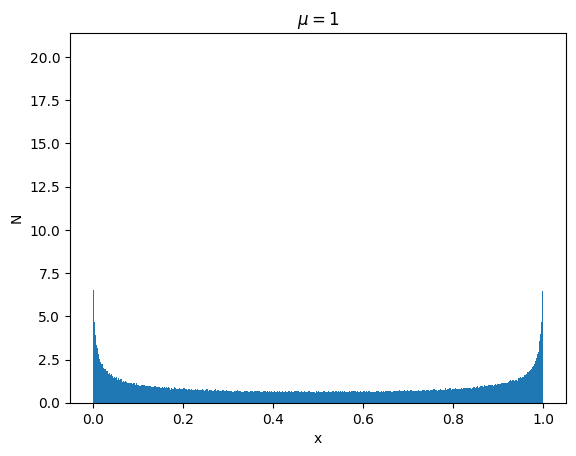

In [11]:
plt.hist(density, 1000, density=True)
plt.xlabel('x')
plt.ylabel('N')
plt.title(f'$\mu = {mu}$');

## Part c.

In [12]:
x = 0.1
mu = 0.9

# Discard the transient states
for _ in range(1000):
    x = f(x, mu=mu)

density = []
for _ in range(1_000_000):
    x = f(x, mu=mu)
    density.append(x)

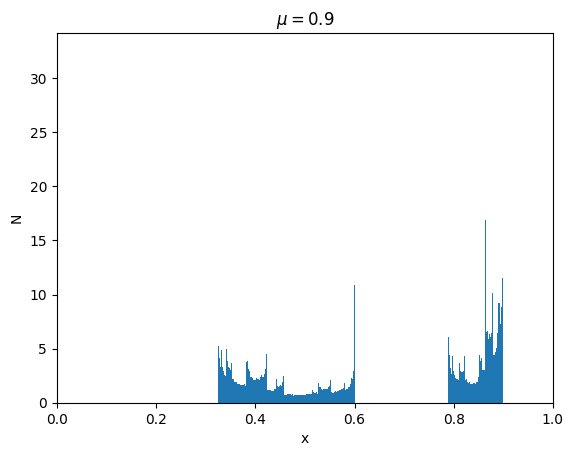

In [13]:
plt.hist(density, 1000, density=True)
plt.xlabel('x')
plt.ylabel('N')
plt.xlim([0, 1])
plt.title(f'$\mu = {mu}$');

## Part d.

In [14]:
x = 0.5
cusps = []

for i in range(8):
    x = f(x, mu=0.9)
    print(f'{i}: {x}')
    cusps.append(x)

0: 0.9
1: 0.32399999999999995
2: 0.7884863999999999
3: 0.6003921492541442
4: 0.863717098925281
5: 0.4237555390177584
6: 0.8790724158102988
7: 0.3826947728582781


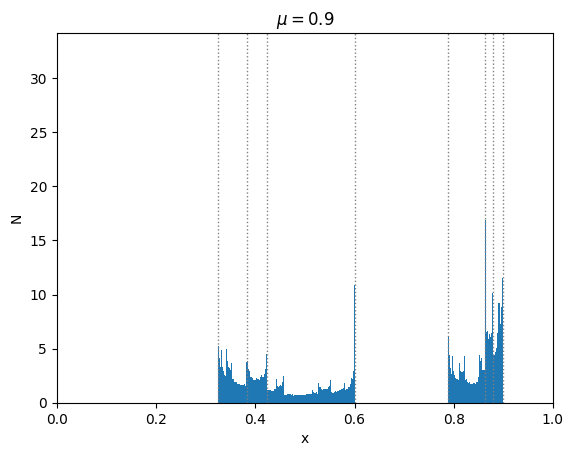

In [15]:
plt.hist(density, 1000, density=True)
plt.xlabel('x')
plt.ylabel('N')
plt.xlim([0, 1])
for cusp in cusps:
    plt.axvline(cusp, color='gray', linestyle=':', linewidth=1)
plt.title(f'$\mu = {mu}$');

## Part e.

In [16]:
def calc_orbits(mu, N, x0=0.4, burn_in=1000):
    orbits = np.zeros(N)
    x = x0
    for _ in range(burn_in):
        x = f(x, mu=mu)
    
    for i in range(N):
        x = f(x, mu=mu)
        orbits[i] = x
    
    return orbits

In [17]:
N_iters = 1000
N_mus = 2000
orbits = np.zeros((N_mus, N_iters))
mus = np.linspace(0.8, 1, num=N_mus)

for i, mu in enumerate(mus):
    orbits[i] = calc_orbits(mu, N_iters)

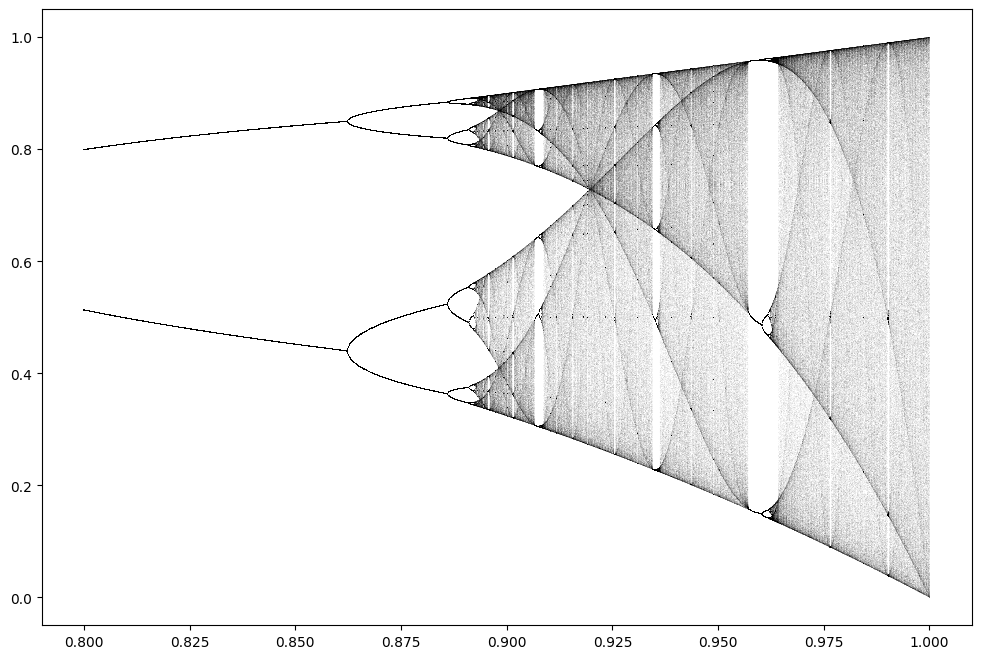

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(
    np.repeat(mus, N_iters),
    orbits.flatten(),
    s=0.1,
    color='k',
    marker='.',
    edgecolor='none',
);

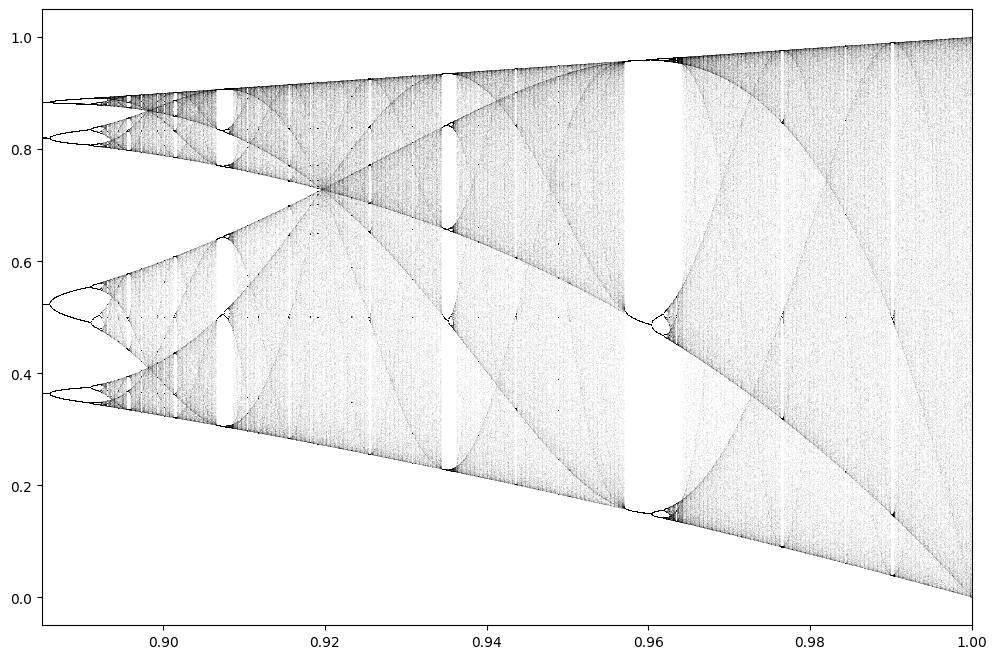

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(
    np.repeat(mus, N_iters),
    orbits.flatten(),
    s=0.1,
    color='k',
    marker='.',
    edgecolor='none',
)
plt.xlim([0.885, 1]);

In [20]:
boundaries = np.zeros((8, N_mus))

for i, mu in enumerate(mus):
    x = 0.5
    for j in range(8):
        x = f(x, mu=mu)
        boundaries[j, i] = x

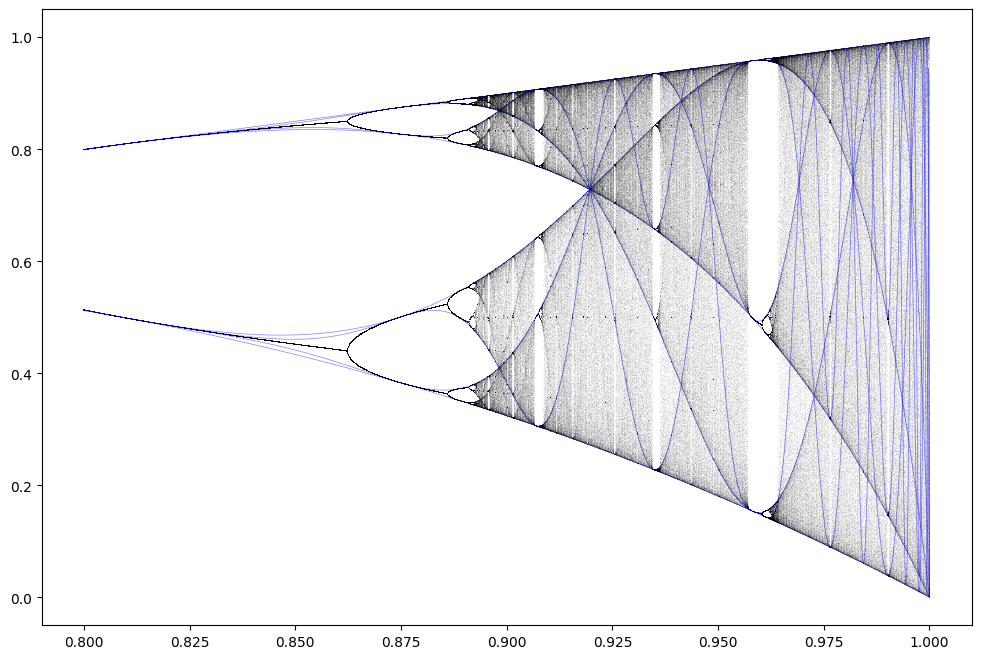

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(
    np.repeat(mus, N_iters),
    orbits.flatten(),
    s=0.1,
    color='k',
    marker='.',
    edgecolor='none',
)
for boundary in boundaries:
    plt.plot(mus, boundary, color='b', linewidth=0.5, alpha=0.5);